In [1]:
import pandas as pd
import numpy as np
from skrub import TableReport
import matplotlib.pyplot as plt

Lectura del dataset y reporte inicial

In [2]:
df = pd.read_csv('../data/raw/autoinvestor_inputdata_20210604.csv', sep=';')

In [3]:
TableReport(df)

Processing column  18 / 18


,,,,,,,,,,,,,,,,,,


Limpieza y procesamiento

In [4]:
df = df.loc[df['MUNICIPALITY'] == 'Madrid'].copy() # Extracción de datos solo de Madrid

# Pasar periodo a año y mes y eliminar la columna
df['YEAR'] = df['PERIOD'] // 100
df['MONTH'] = df['PERIOD'] % 100
df = df.drop('PERIOD', axis=1)

Guardar reporte

In [5]:
report = TableReport(df)

# Guardar reporte HTML
with open('../reports/report_autoinvestor.html', 'w') as f:
    f.write(report.html())
print('\n--> Reporte guardado en reports/report_autoinvestor.html\n')

Processing column  19 / 19



--> Reporte guardado en reports/report_autoinvestor.html



In [6]:
print(f"""Datos de interés:
      - {df.shape[0]} datos de viviendas.
      - Precio de venta medio: {round(df['PRICE_SALE'].mean())}€.
      - Precio de alquiler medio: {round(df['PRICE_RENT'].mean())}€.
      - Periodo: {min(df[df['YEAR'] == min(df['YEAR'])]['MONTH'])}/{min(df['YEAR'])} - {max(df[df['YEAR'] == max(df['YEAR'])]['MONTH'])}/{max(df['YEAR'])}
""")

Datos de interés:
      - 1617 datos de viviendas.
      - Precio de venta medio: 403989€.
      - Precio de alquiler medio: 1095€.
      - Periodo: 1/2015 - 5/2021



Visualización de precios


--> Gráficos de precios guardados en reports/figures/price_evo.png



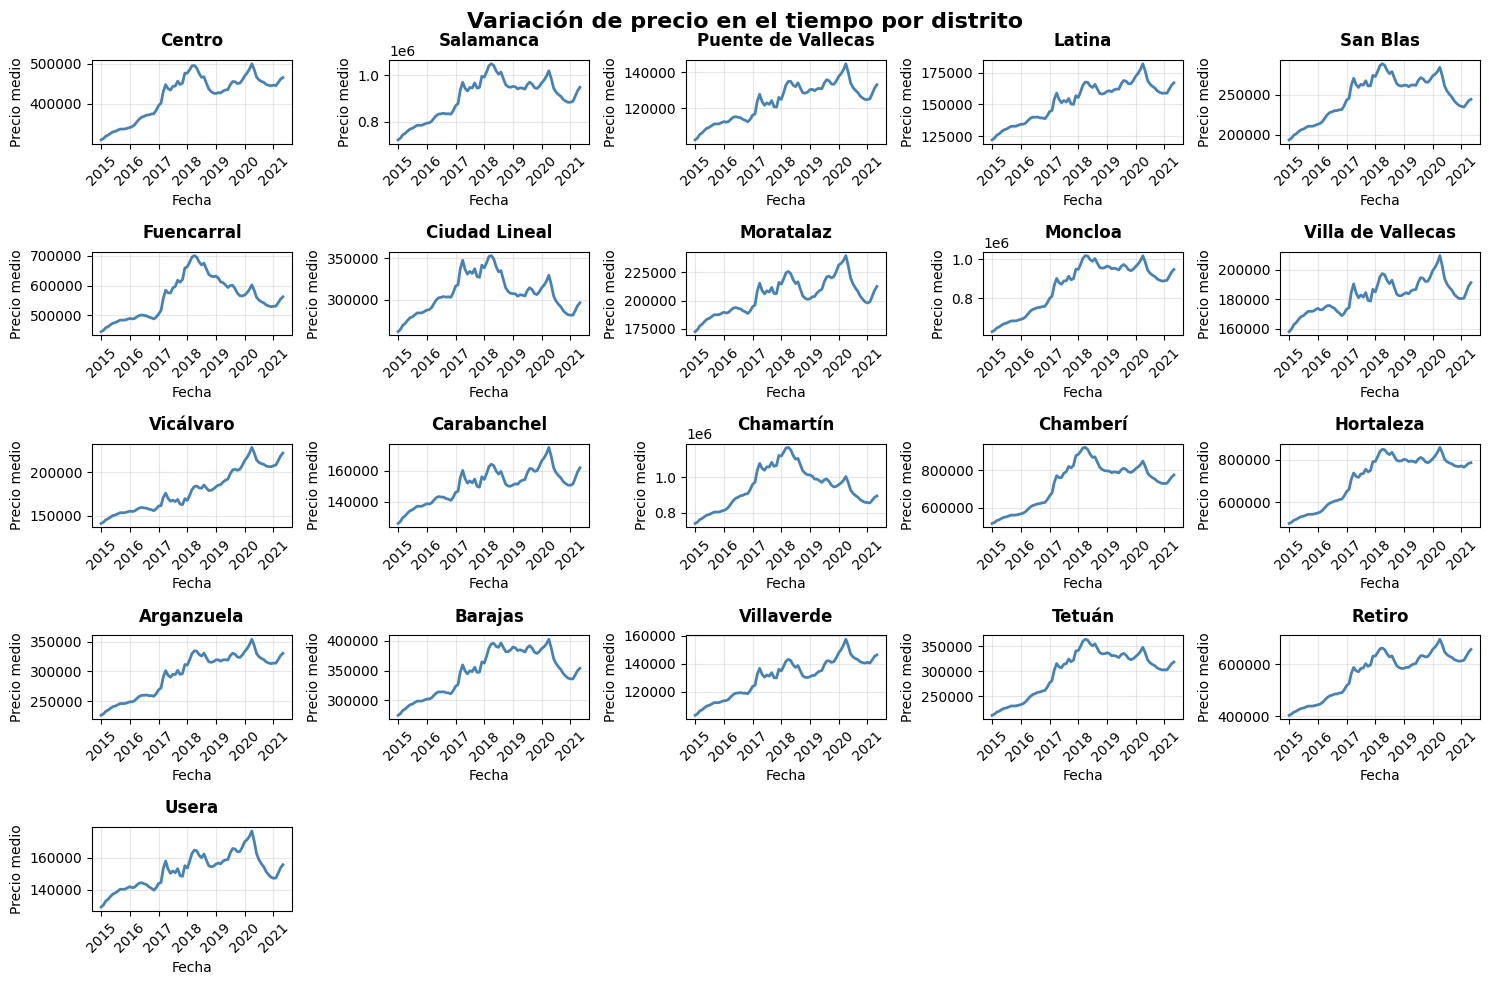

In [7]:
# Gráficos para mostrar evolución de precios por distrito
df_plot = df.copy()

df_plot['DATE'] = pd.to_datetime(df_plot[['YEAR', 'MONTH']].assign(day=1))
df_plot = df_plot.sort_values('DATE')

distritos = df_plot['LOCATIONNAME'].unique()
n_distritos = len(distritos)

n_cols = int(np.ceil(np.sqrt(n_distritos)))
n_rows = int(np.ceil(n_distritos / n_cols))

plt.figure(figsize=(15, 10))
plt.suptitle('Variación de precio en el tiempo por distrito', fontsize=16, fontweight='bold')

for i, distrito in enumerate(distritos):
    plt.subplot(n_rows, n_cols, i + 1)
    
    district_data = df_plot[df_plot['LOCATIONNAME'] == distrito].copy()
    district_data = district_data.sort_values('DATE')
    
    plt.plot(district_data['DATE'], district_data['PRICE_SALE'], 
             linewidth=2, color='steelblue')

    plt.title(f'{distrito}', fontweight='bold', pad=10)
    plt.xlabel('Fecha')
    plt.ylabel('Precio medio')
    plt.grid(True, alpha=0.3)
    
    plt.xticks(rotation=45)

plt.tight_layout()
plt.subplots_adjust(top=0.93)

plt.savefig('../reports/figures/price_evo.png', dpi=300, bbox_inches='tight')

print('\n--> Gráficos de precios guardados en reports/figures/price_evo.png\n')

plt.show()

Guardar csv procesado

In [8]:
# Guardar csv con datos limpios
df.to_csv('../data/processed/autoinvestor_procesado.csv')

print('\n--> Datos procesados guardados en data/processed/autoinvestor_procesado.csv\n')


--> Datos procesados guardados en data/processed/autoinvestor_procesado.csv

